In [ ]:
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()

In [ ]:
!nvidia-smi

Thu Oct 24 05:51:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 31.5 MB/s eta 0:00:00


In [ ]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
ultralytics.checks()

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/112.6 GB disk)


In [8]:
!mkdir content/datasets
%cd content/datasets

# for dataset on ASL sign language
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("duyguj").project("american-sign-language-letters-vouo0")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov8:: 100%|██████████| 2424/2424 [00:00<00:00, 8323.33it/s]


In [9]:
%cd content

/content


In [10]:
%cd {dataset.location}

/content/datasets/American-Sign-Language-Letters-1


In [11]:
%cd content

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 imgsz=800

/content
100% 83.7M/83.7M [00:00<00:00, 377MB/s]
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/American-Sign-Language-Letters-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

/content


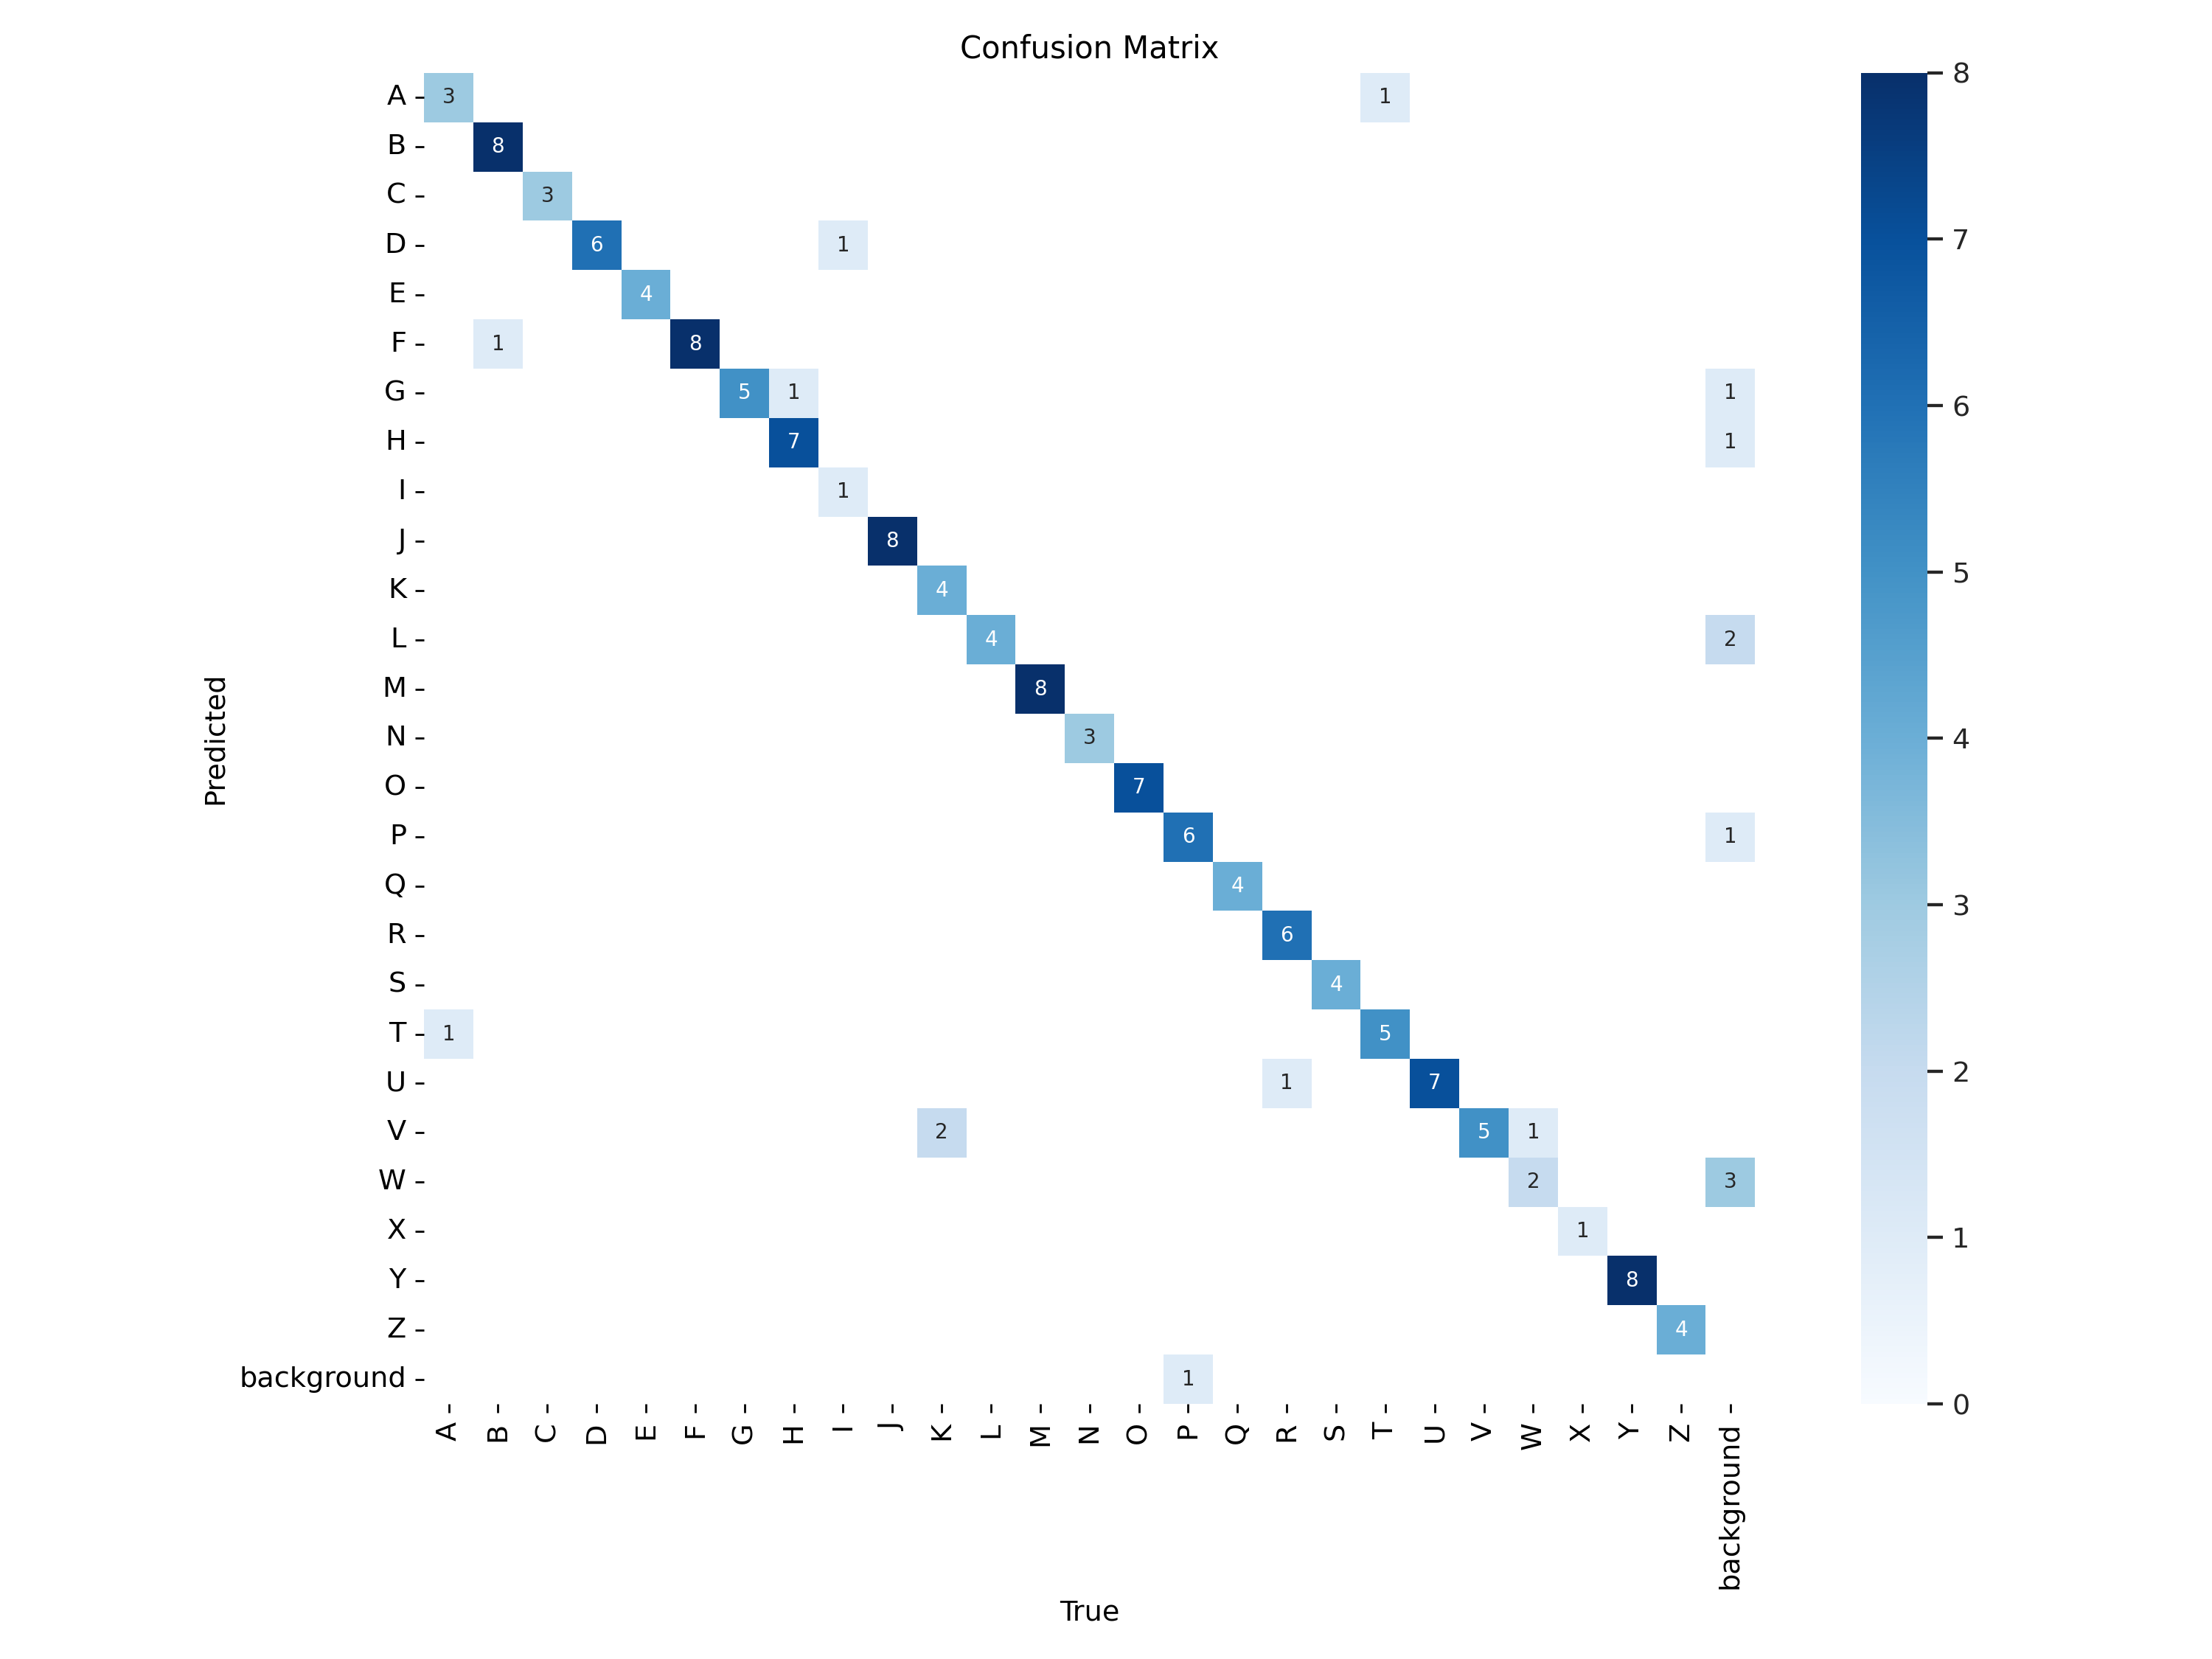

In [12]:
%cd content

Image(filename='content/runs/detect/train/confusion_matrix.png', width=900)

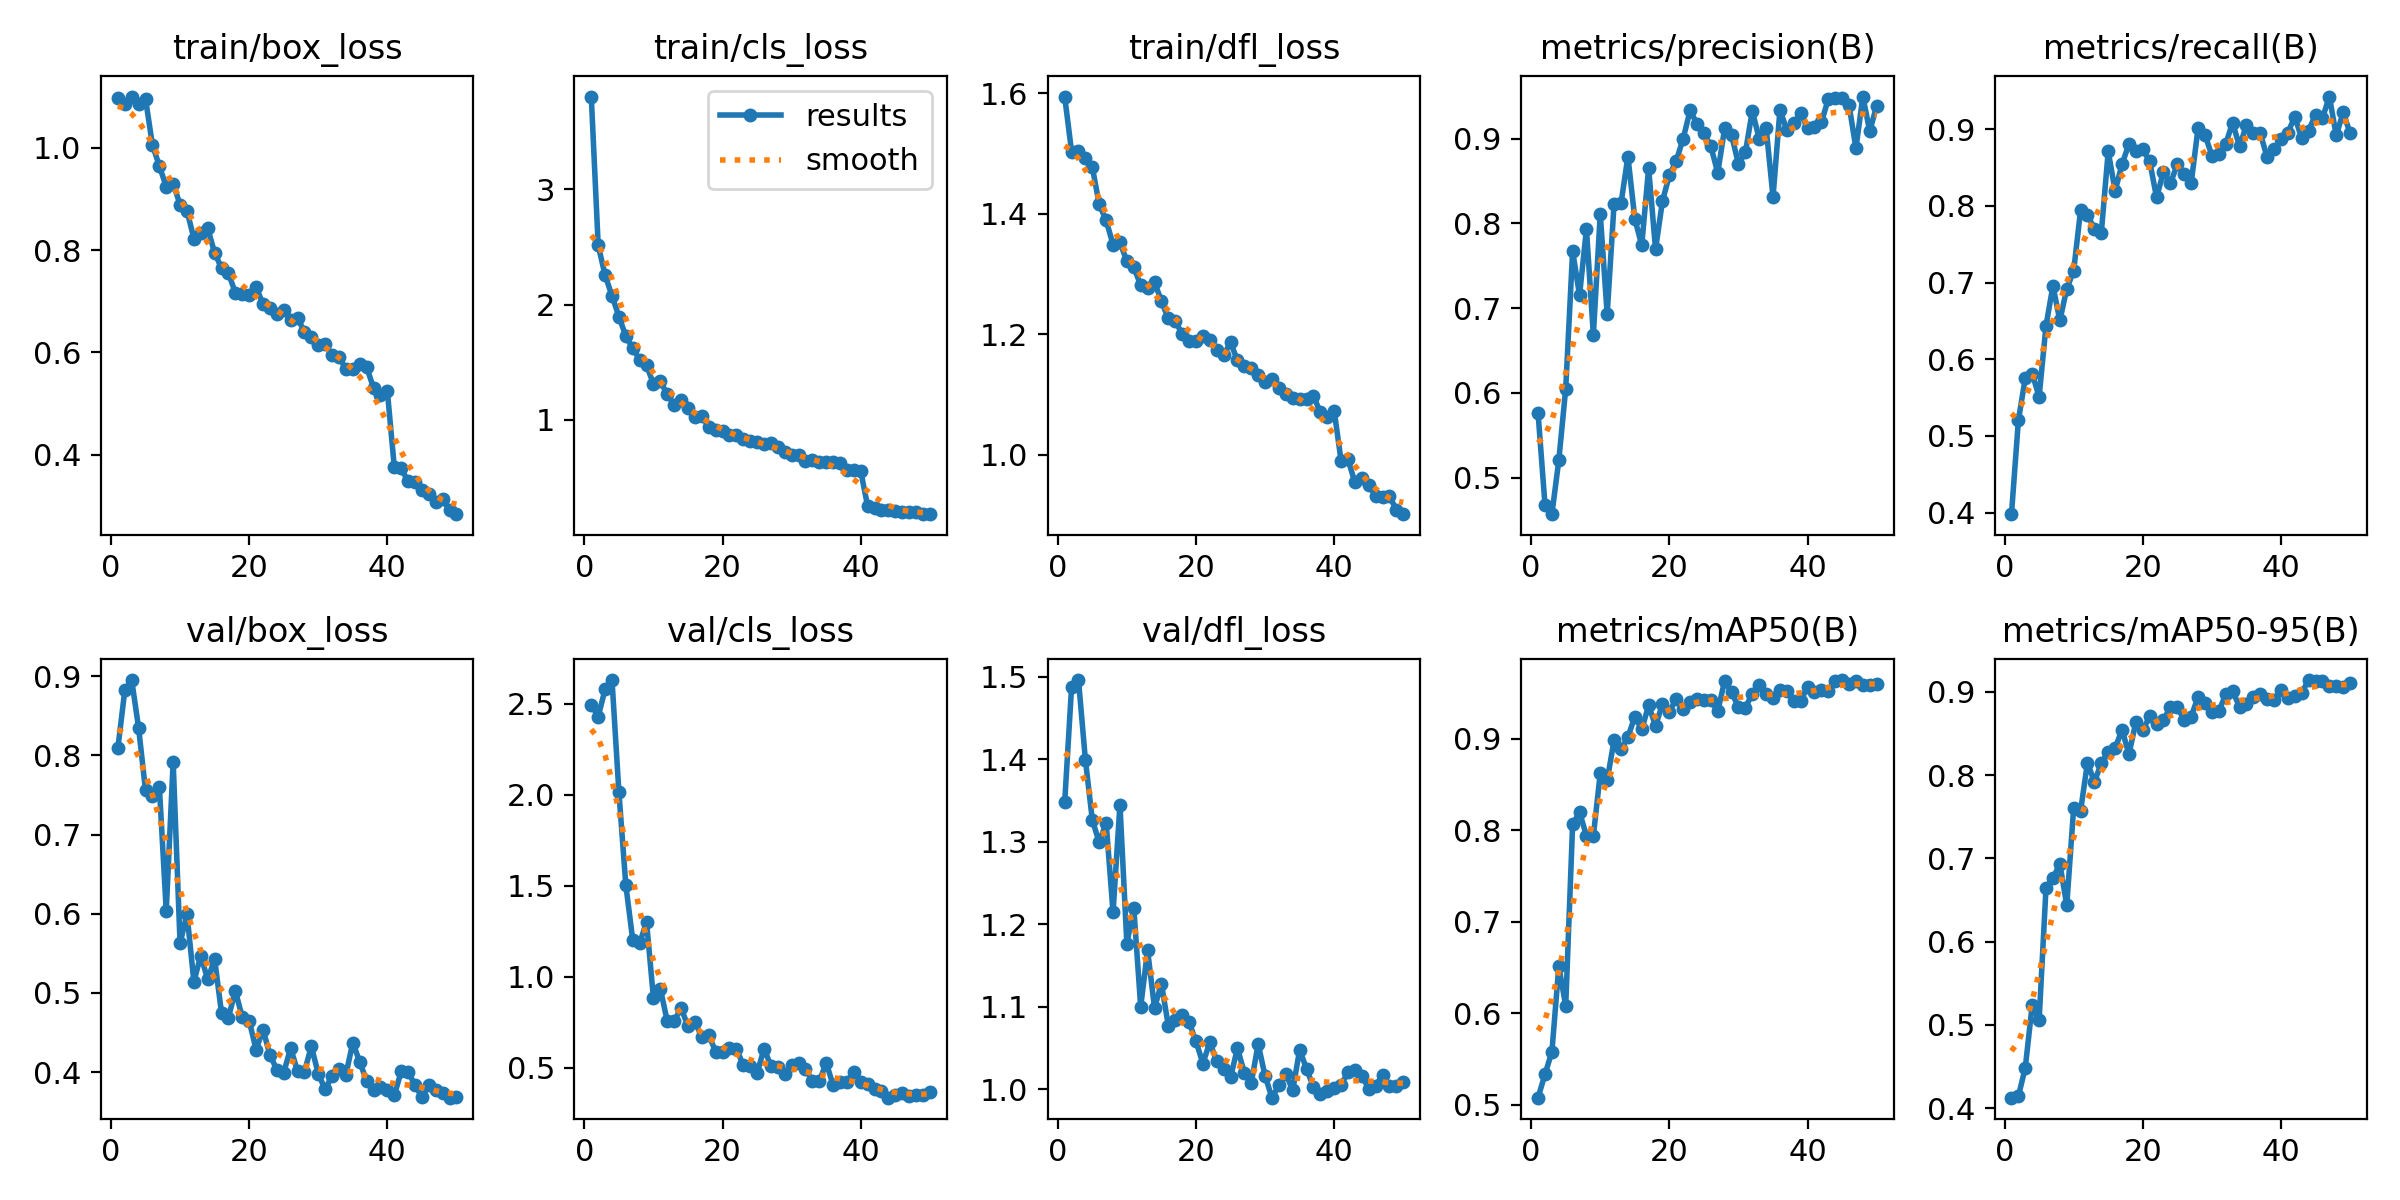

In [14]:
Image(filename='content/runs/detect/train/results.png', width=900)

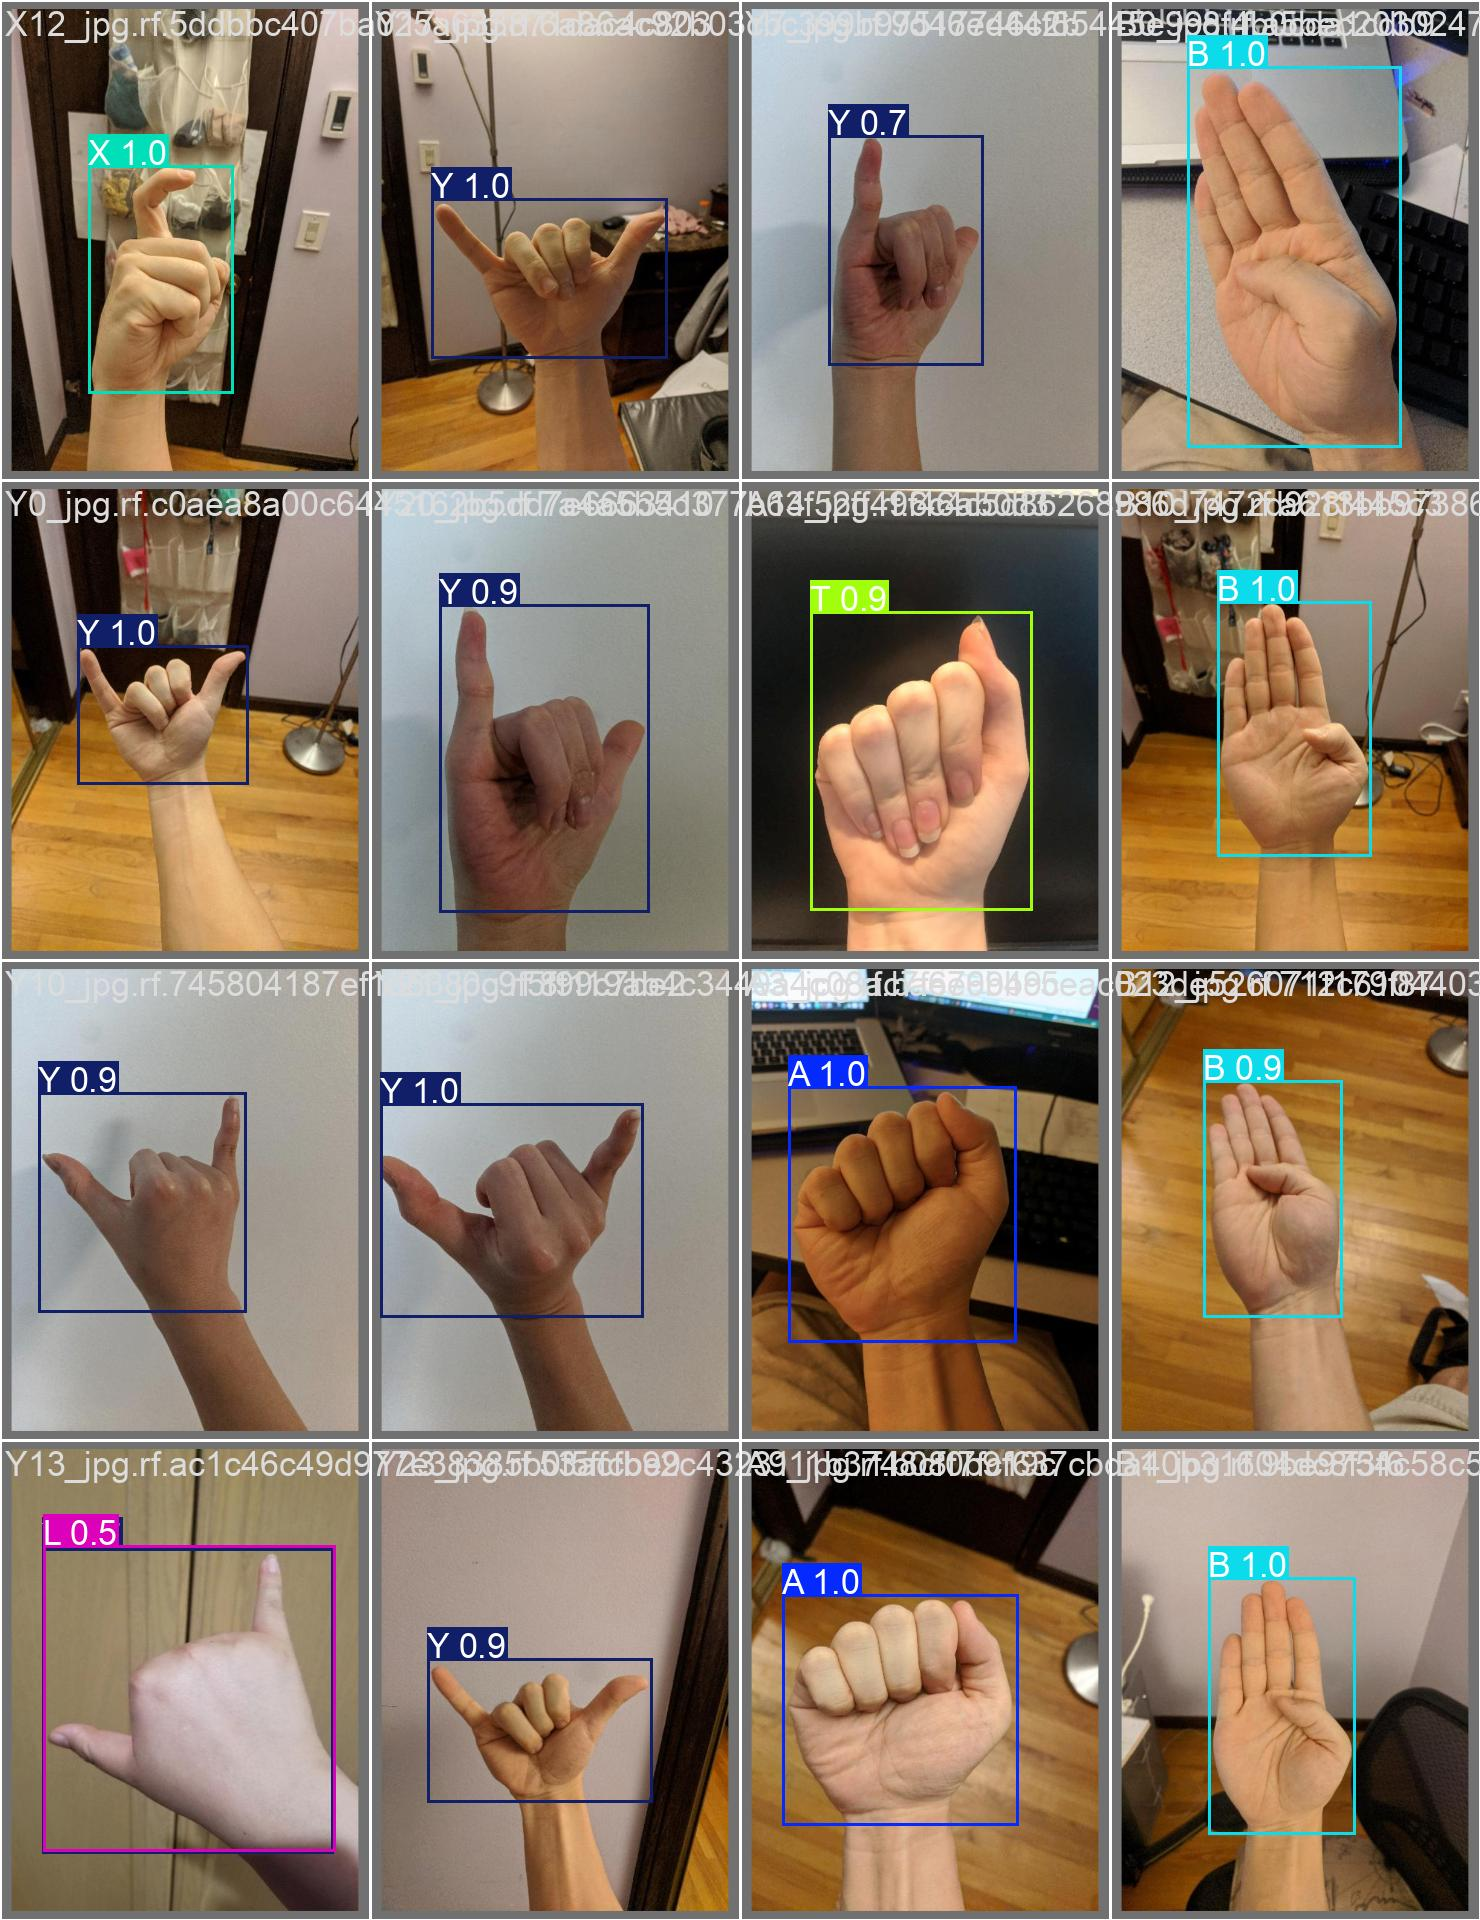

In [15]:
Image(filename='content/runs/detect/train/val_batch0_pred.jpg', width=600)

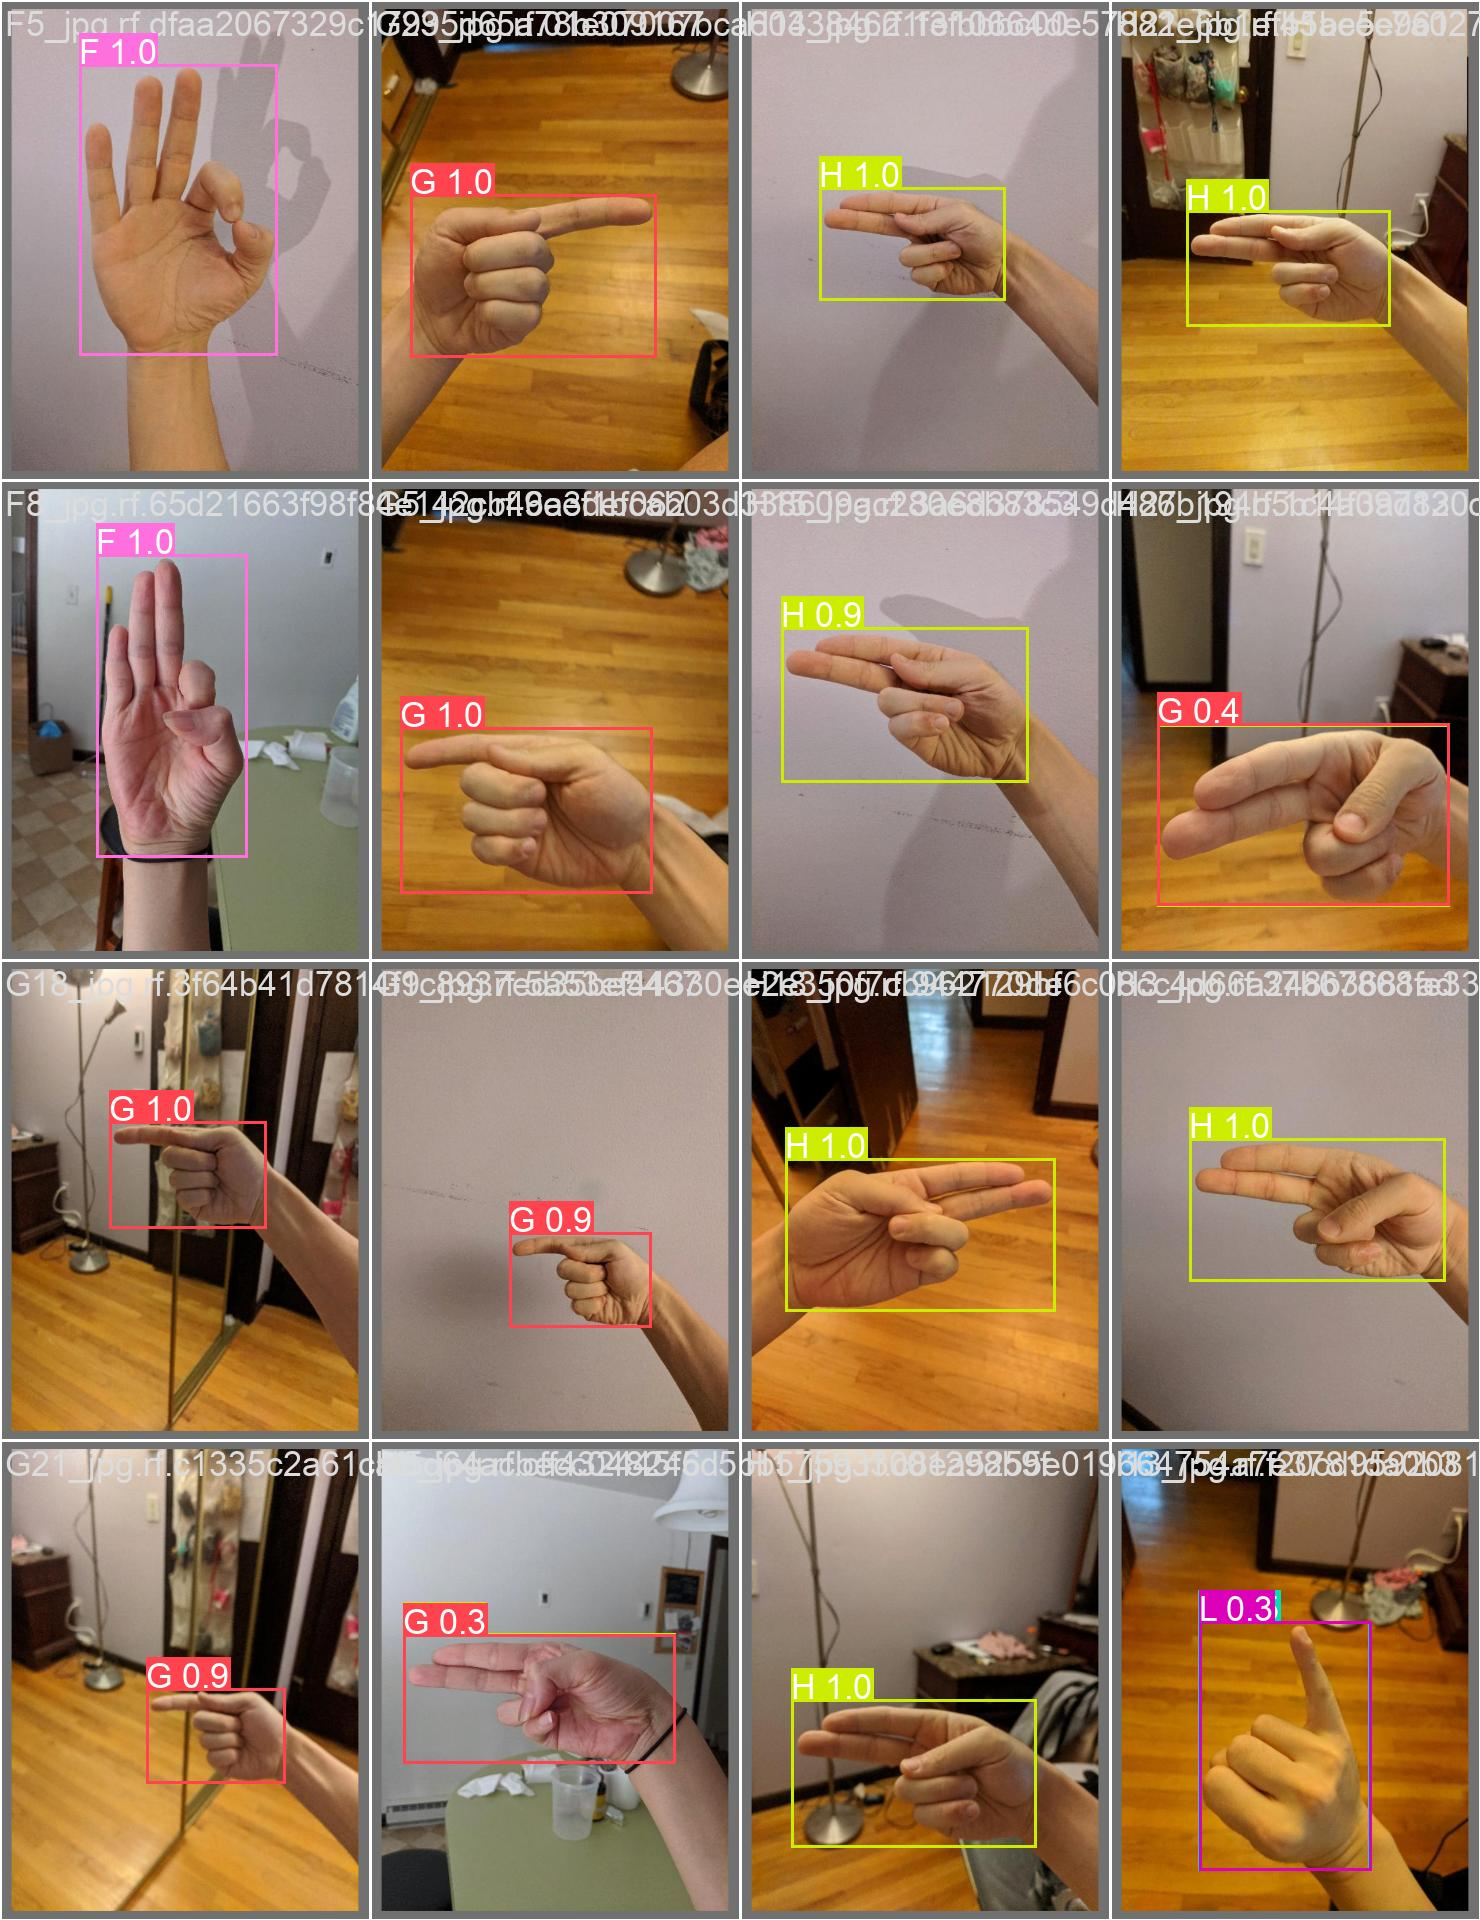

In [19]:
Image(filename='content/runs/detect/train/val_batch1_pred.jpg', width=600)

In [20]:
!yolo task=detect mode=val model='content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,626,654 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/datasets/American-Sign-Language-Letters-1/valid/labels.cache... 141 images, 0 backgrounds, 0 corrupt: 100% 141/141 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:07<00:00,  1.24it/s]
                   all        141        141      0.948      0.898      0.963      0.914
                     A          4          4      0.912       0.75      0.888      0.875
                     B          9          9       0.99      0.889      0.984      0.921
                     C          3          3      0.946          1      0.995      0.867
                     D          6          6      0.938      0.833      0.972      0.899
                     E          4          4          1      0.853      0.995      0.995
                     

In [21]:
!yolo task=detect mode=predict model=content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,626,654 parameters, 0 gradients, 164.9 GFLOPs

image 1/69 /content/datasets/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.32b37dafb1697aedc8cf0c8c9b94c2de.jpg: 800x608 1 A, 83.0ms
image 2/69 /content/datasets/American-Sign-Language-Letters-1/test/images/B14_jpg.rf.832681456547ed123b00a0d184c3cede.jpg: 800x608 1 B, 49.1ms
image 3/69 /content/datasets/American-Sign-Language-Letters-1/test/images/B15_jpg.rf.56b1ab35b4bcd2a80fdb1d0a89d61e55.jpg: 800x608 1 B, 49.1ms
image 4/69 /content/datasets/American-Sign-Language-Letters-1/test/images/B19_jpg.rf.97c88cb7ab8e5dab6977a87f417d5c22.jpg: 800x608 1 B, 49.0ms
image 5/69 /content/datasets/American-Sign-Language-Letters-1/test/images/C17_jpg.rf.d0e4d411e11387230350ecf46922a91e.jpg: 800x608 1 C, 48.9ms
image 6/69 /content/datasets/American-Sign-Language-Letters-1/test/images/C19_jpg.rf.78aaeecc2848e5e78a8eff72e652c55c.

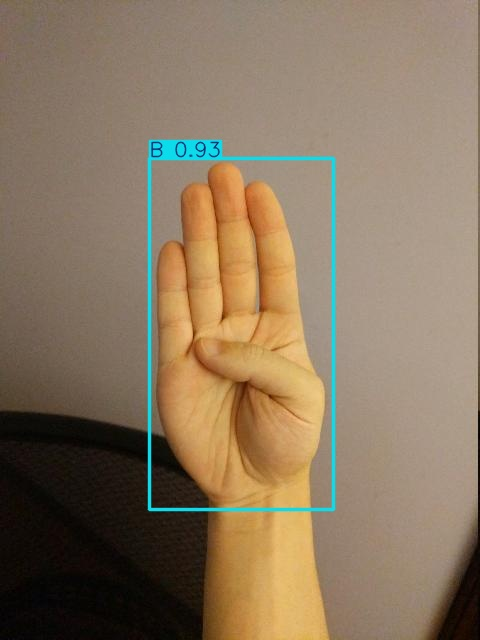

In [23]:
Image(filename='content/runs/detect/predict/B14_jpg.rf.832681456547ed123b00a0d184c3cede.jpg', width=600)

In [25]:
from google.colab import files
files.download('content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>